In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import generate_data as gen_d

In [65]:
%matplotlib inline
plt.style.use("fivethirtyeight")

# Exploration

In [66]:
df = pd.read_csv("blackjack.csv")

In [67]:
df.shape

(10000, 20)

In [68]:
df.describe()

,num_decks,dealer_open,dealer_initial,dealer_hit,dealer_num_hits,dealer_final,dealer_busts,player_card_one,player_card_two,player_initial,player_hit,player_num_hits,player_final,player_busts,player_loses,draw,player_wins,strategy
count,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.0,6.594900,14.598600,0.408400,0.554800,18.102500,0.176100,6.540000,6.483300,14.523300,0.574100,0.853000,19.86650,0.297600,0.551500,0.071700,0.376800,0.500000
std,0.0,3.156199,4.058784,0.491562,0.768932,4.327131,0.380924,3.139902,3.145936,4.077023,0.494503,0.906793,3.91556,0.457225,0.497366,0.258003,0.484608,0.500025
min,4.0,1.000000,4.000000,0.000000,0.000000,4.000000,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,5.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.0,4.000000,12.000000,0.000000,0.000000,17.000000,0.000000,4.000000,4.000000,12.000000,0.000000,0.000000,18.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.0,7.000000,15.000000,0.000000,0.000000,19.000000,0.000000,7.000000,7.000000,15.000000,1.000000,1.000000,20.00000,0.000000,1.000000,0.000000,0.000000,0.500000
75%,4.0,10.000000,18.000000,1.000000,1.000000,21.000000,0.000000,10.000000,10.000000,18.000000,1.000000,1.000000,22.00000,1.000000,1.000000,0.000000,1.000000,1.000000
max,4.0,10.000000,21.000000,1.000000,5.000000,26.000000,1.000000,10.000000,10.000000,21.000000,1.000000,5.000000,28.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
df.groupby("strategy")[["player_wins"]].mean()

,player_wins
strategy,
0,0.365300
1,0.400025


# Hypothesis testing

$H_0$: There is no difference in results for the player between a random strategy and a recommended strategy.

$H_1$: There is a difference in results for the player between a random strategy and a recommended strategy.

Significance level, $\alpha$: 5%

In [9]:
# Simulate trials of 100 games
def sim_trial():
    ran = gen_d.gen_df(gen_d.gen_data(num_decks=4, df_size=50, strategy=0))
    ran = ran[["dealer_busts", "player_busts", "player_loses", "draw", "player_wins", "strategy"]].sum()/len(ran)
    ran = pd.DataFrame(ran, ["dealer_busts", "player_busts", "player_loses", "draw", "player_wins", "strategy"]).T
    rec = gen_d.gen_df(gen_d.gen_data(num_decks=4, df_size=50, strategy=1))
    rec = rec[["dealer_busts", "player_busts", "player_loses", "draw", "player_wins", "strategy"]].sum()/len(rec)
    rec = pd.DataFrame(rec, ["dealer_busts", "player_busts", "player_loses", "draw", "player_wins", "strategy"]).T
    sub = pd.concat([ran, rec])
    return sub

In [10]:
def n_trials(n=5000):
    trials = sim_trial()
    for _ in range(n-1):
        trials = pd.concat([trials, sim_trial()])
        
    return trials

In [11]:
trials = pd.read_csv("trials.csv")

In [12]:
trials.shape

(50000, 6)

In [13]:
trials.describe()

,dealer_busts,player_busts,player_loses,draw,player_wins,strategy
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.177014,0.295890,0.545973,0.071444,0.382583,0.500000
std,0.071373,0.182232,0.074321,0.036885,0.071278,0.500005
min,0.000000,0.000000,0.240000,0.000000,0.100000,0.000000
25%,0.120000,0.120000,0.500000,0.040000,0.340000,0.000000
50%,0.180000,0.260000,0.540000,0.060000,0.380000,0.500000
75%,0.220000,0.460000,0.600000,0.100000,0.440000,1.000000
max,0.460000,0.820000,0.860000,0.280000,0.680000,1.000000


## Difference between losing, drawing and winning

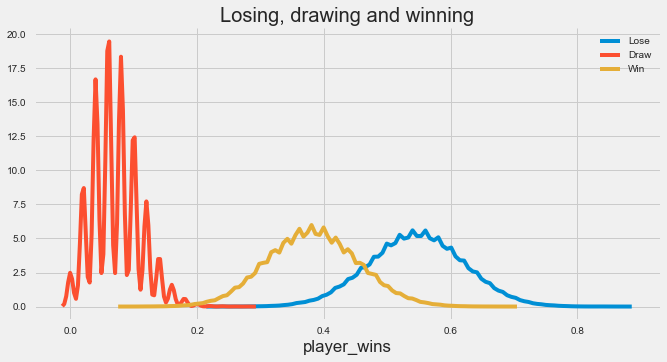

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5));
sns.distplot(trials.player_loses, hist=False, label="Lose");
sns.distplot(trials.draw, hist=False, label="Draw");
sns.distplot(trials.player_wins, hist=False, label="Win");
ax.set_title("Losing, drawing and winning");
sns.despine();

## Losses

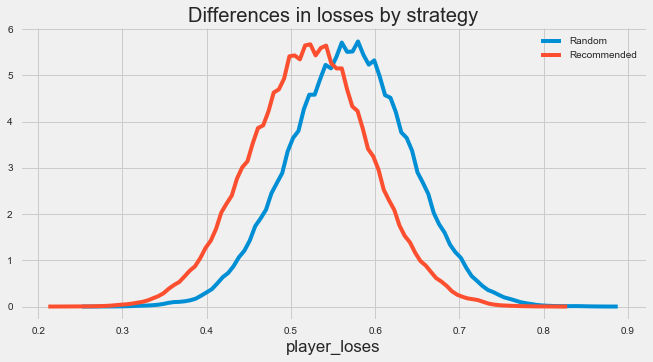

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5));
sns.distplot(trials.player_loses[trials.strategy==0.0], 
             hist=False, label="Random");
sns.distplot(trials.player_loses[trials.strategy==1.0], 
             hist=False, label="Recommended");
ax.set_title("Differences in losses by strategy");
sns.despine();

## Draws

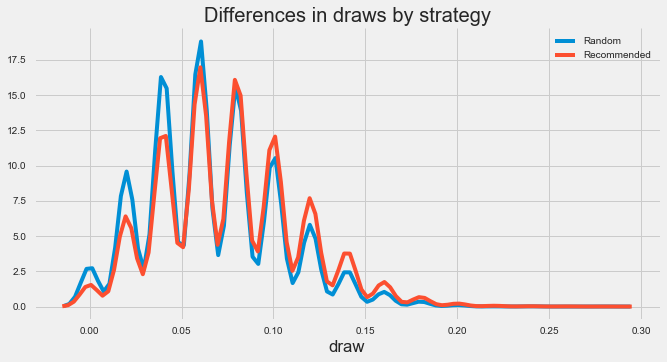

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5));
sns.distplot(trials.draw[trials.strategy==0.0], 
             hist=False, label="Random");
sns.distplot(trials.draw[trials.strategy==1.0], 
             hist=False, label="Recommended");
ax.set_title("Differences in draws by strategy");
sns.despine();

## Wins

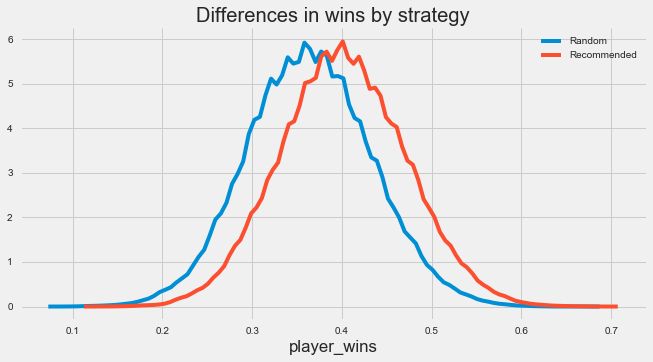

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5));
sns.distplot(trials.player_wins[trials.strategy==0.0], 
             hist=False, label="Random");
sns.distplot(trials.player_wins[trials.strategy==1.0], 
             hist=False, label="Recommended");
ax.set_title("Differences in wins by strategy");
sns.despine();

## Player busting

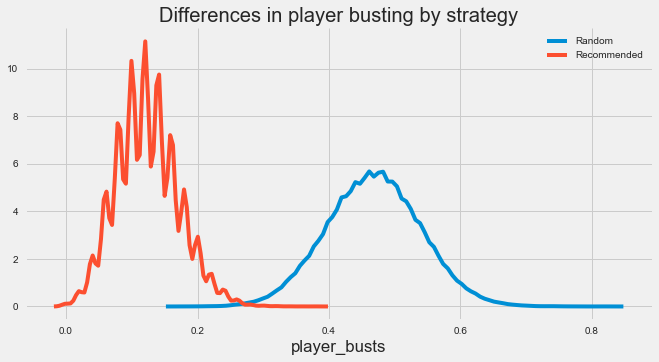

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5));
sns.distplot(trials.player_busts[trials.strategy==0.0], 
             hist=False, label="Random");
sns.distplot(trials.player_busts[trials.strategy==1.0], 
             hist=False, label="Recommended");
ax.set_title("Differences in player busting by strategy");
sns.despine();

## Dealer busting

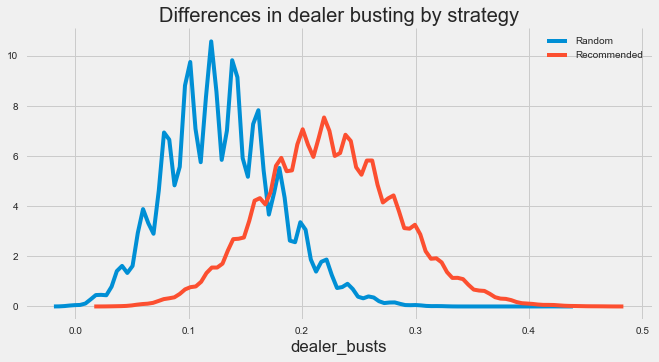

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5));
sns.distplot(trials.dealer_busts[trials.strategy==0.0], 
             hist=False, label="Random");
sns.distplot(trials.dealer_busts[trials.strategy==1.0], 
             hist=False, label="Recommended");
ax.set_title("Differences in dealer busting by strategy");
sns.despine();

# Statistical testing

![t-test](https://camo.githubusercontent.com/3fe864d148f460fadd369d42645f60feebe77672/687474703a2f2f696d616765732e7475746f7276697374612e636f6d2f636d732f696d616765732f3131332f742d746573742d666f726d756c612e706e67)

## Is the difference in the 'rate' of losing between strategies statistically significant?

In [23]:
ran_lose = trials.player_loses[trials.strategy==0]
rec_lose = trials.player_loses[trials.strategy==1]
tt = (np.mean(ran_lose)-np.mean(rec_lose)) / np.sqrt((np.var(ran_lose)/len(ran_lose))+(np.var(rec_lose)/len(rec_lose)))
pval = stats.t.sf(abs(tt), len(rec_lose)-1)
print ("{:.2f}, {:.10f}".format(tt, pval))

74.23, 0.0000000000


## Is the difference in the 'rate' of winning between strategies statistically significant?

In [24]:
ran_win = trials.player_wins[trials.strategy==0]
rec_win = trials.player_wins[trials.strategy==1]
tt = (np.mean(ran_win)-np.mean(rec_win)) / np.sqrt((np.var(ran_win)/len(ran_win))+(np.var(rec_win)/len(rec_win)))
pval = stats.t.sf(abs(tt), len(rec_win)-1)
print ("{:.2f}, {:.10f}".format(tt, pval))

-61.15, 0.0000000000


## Is the difference in the 'rate' of busting between strategies statistically significant?

In [25]:
ran_busts = trials.player_busts[trials.strategy==0]
rec_busts = trials.player_busts[trials.strategy==1]
tt = (np.mean(ran_busts)-np.mean(rec_busts)) / np.sqrt((np.var(ran_busts)/len(ran_busts))+(np.var(rec_busts)/len(rec_busts)))
pval = stats.t.sf(abs(tt), len(rec_busts)-1)
print ("{:.2f}, {:.10f}".format(tt, pval))

640.42, 0.0000000000


In [27]:
ran_dbusts = trials.dealer_busts[trials.strategy==0]
rec_dbusts = trials.dealer_busts[trials.strategy==1]
tt = (np.mean(ran_dbusts)-np.mean(rec_dbusts)) / np.sqrt((np.var(ran_dbusts)/len(ran_dbusts))+(np.var(rec_dbusts)/len(rec_dbusts)))
pval = stats.t.sf(abs(tt), len(rec_dbusts)-1)
print ("{:.2f}, {:.10f}".format(tt, pval))

-198.09, 0.0000000000


# Looking at the dataset

In [28]:
df.head()

,num_decks,dealer_open,dealer_initial,dealer_hit,dealer_num_hits,dealer_final,dealer_busts,player_inital,player_hit,player_num_hits,player_final,player_busts,player_loses,draw,player_wins,strategy,dealer_hand,player_hand
0,4,2,12,1,2,23,1,19,0,0,19,0,0,0,1,0,"[2, 'K', 3, 8]","['A', 8]"
1,4,3,13,1,2,18,0,16,1,1,19,0,0,0,1,0,"[3, 'K', 'A', 4]","['J', 6, 3]"
2,4,7,15,0,0,15,0,14,1,1,24,1,1,0,0,0,"[7, 8]","[4, 'K', 'Q']"
3,4,10,19,0,0,19,0,7,1,2,22,1,1,0,0,0,"[10, 9]","[4, 3, 'K', 5]"
4,4,7,17,0,0,17,0,11,1,2,22,1,1,0,0,0,"[7, 'J']","[4, 7, 'A', 'Q']"


## Analysis by one card

- To determine if we want to split
- Look at the probability of winning based on one card
    - Use first card for simplicity

In [76]:
one_card = df.groupby(["player_card_one", "strategy"])[["player_loses", "draw", "player_wins"]].sum()
one_card.reset_index(inplace=True)
one_card["cases"] = one_card[["player_loses", "draw", "player_wins"]].apply(sum, axis=1)
one_card.head()

,player_card_one,strategy,player_loses,draw,player_wins,cases
0,1,0,155,31,229,415
1,1,1,129,29,194,352
2,2,0,199,17,117,333
3,2,1,234,25,131,390
4,3,0,248,31,128,407


In [71]:
for i in ["player_loses", "draw", "player_wins"]:
    one_card["p_"+i] = one_card[i]/one_card["cases"]

In [72]:
one_card.head()

,player_card_one,strategy,player_loses,draw,player_wins,cases,p_player_loses,p_draw,p_player_wins
0,1,0,155,31,229,415,0.373494,0.074699,0.551807
1,1,1,129,29,194,352,0.366477,0.082386,0.551136
2,2,0,199,17,117,333,0.597598,0.051051,0.351351
3,2,1,234,25,131,390,0.600000,0.064103,0.335897
4,3,0,248,31,128,407,0.609337,0.076167,0.314496


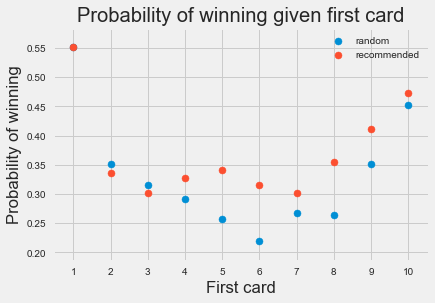

In [73]:
plt.scatter(one_card[one_card["strategy"]==0][["player_card_one"]], 
            one_card[one_card["strategy"]==0][["p_player_wins"]], label="random");
plt.scatter(one_card[one_card["strategy"]==1][["player_card_one"]], 
            one_card[one_card["strategy"]==1][["p_player_wins"]], label="recommended");
plt.legend();
plt.title("Probability of winning given first card");
plt.xlabel("First card");
plt.xticks(np.arange(1,11));
plt.ylabel("Probability of winning");

## Analysis by initial points

In [74]:
df.columns

Index(['num_decks', 'dealer_open', 'dealer_initial', 'dealer_hit',
       'dealer_num_hits', 'dealer_final', 'dealer_busts', 'player_card_one',
       'player_card_two', 'player_initial', 'player_hit', 'player_num_hits',
       'player_final', 'player_busts', 'player_loses', 'draw', 'player_wins',
       'strategy', 'dealer_hand', 'player_hand'],
      dtype='object')

### By player

In [80]:
player_start = df.groupby(["player_initial", "strategy"])[["player_loses", "draw", "player_wins"]].sum()
player_start.reset_index(inplace=True)
player_start["cases"] = player_start[["player_loses", "draw", "player_wins"]].apply(sum, axis=1)
for i in ["player_loses", "draw", "player_wins"]:
    player_start["p_"+i] = player_start[i]/player_start["cases"]
player_start.head()

,player_initial,strategy,player_loses,draw,player_wins,cases,p_player_loses,p_draw,p_player_wins
0,4,0,17,0,8,25,0.680000,0.000000,0.320000
1,4,1,17,2,7,26,0.653846,0.076923,0.269231
2,5,0,43,4,17,64,0.671875,0.062500,0.265625
3,5,1,29,4,28,61,0.475410,0.065574,0.459016
4,6,0,53,2,28,83,0.638554,0.024096,0.337349


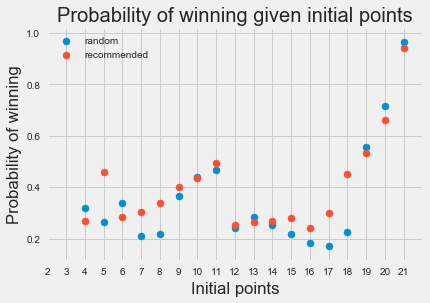

In [83]:
plt.scatter(player_start[player_start["strategy"]==0][["player_initial"]], 
            player_start[player_start["strategy"]==0][["p_player_wins"]], label="random");
plt.scatter(player_start[player_start["strategy"]==1][["player_initial"]], 
            player_start[player_start["strategy"]==1][["p_player_wins"]], label="recommended");
plt.legend();
plt.title("Probability of winning given initial points");
plt.xlabel("Initial points");
plt.xticks(np.arange(2,22));
plt.ylabel("Probability of winning");

### By dealer

In [84]:
dealer_start = df.groupby(["dealer_initial", "strategy"])[["player_loses", "draw", "player_wins"]].sum()
dealer_start.reset_index(inplace=True)
dealer_start["cases"] = dealer_start[["player_loses", "draw", "player_wins"]].apply(sum, axis=1)
for i in ["player_loses", "draw", "player_wins"]:
    dealer_start["p_"+i] = dealer_start[i]/dealer_start["cases"]
dealer_start.head()

,dealer_initial,strategy,player_loses,draw,player_wins,cases,p_player_loses,p_draw,p_player_wins
0,4,0,21,5,9,35,0.600000,0.142857,0.257143
1,4,1,11,2,10,23,0.478261,0.086957,0.434783
2,5,0,30,2,27,59,0.508475,0.033898,0.457627
3,5,1,29,4,21,54,0.537037,0.074074,0.388889
4,6,0,51,2,35,88,0.579545,0.022727,0.397727


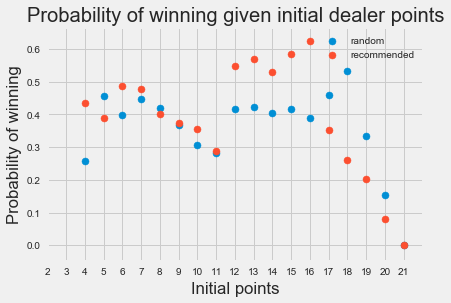

In [85]:
plt.scatter(dealer_start[dealer_start["strategy"]==0][["dealer_initial"]], 
            dealer_start[dealer_start["strategy"]==0][["p_player_wins"]], label="random");
plt.scatter(dealer_start[dealer_start["strategy"]==1][["dealer_initial"]], 
            dealer_start[dealer_start["strategy"]==1][["p_player_wins"]], label="recommended");
plt.legend();
plt.title("Probability of winning given initial dealer points");
plt.xlabel("Initial points");
plt.xticks(np.arange(2,22));
plt.ylabel("Probability of winning");

### By player and dealer

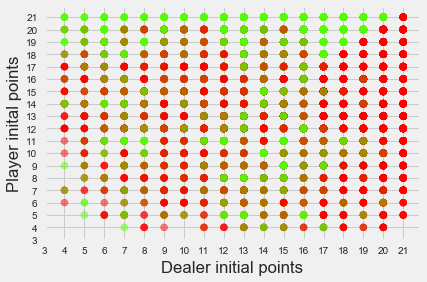

In [104]:
plt.scatter(x="dealer_initial", y="player_initial", c="player_wins", data=df, cmap="prism", alpha=0.5);
plt.xlabel("Dealer initial points");
plt.ylabel("Player inital points");
plt.xticks(np.arange(3,22));
plt.yticks(np.arange(3,22));
# plt.legend(["player_wins", "player_does_not_win"]);